In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('../../../data/kc_house_data_update5.csv')

In [3]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'datefloat', 'renovated', 'bath_per_bed',
       'skinniness', 'dist', 'unemployment', 'median_age', 'median_income',
       'median_prce', 'comfort_index', 'seasonal', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'act_prce',
       'years_since_new', 'log_sqft_living', 'elevation'],
      dtype='object')

In [4]:
categoricals = ['bedrooms','bathrooms','floors','waterfront','view','condition','renovated']

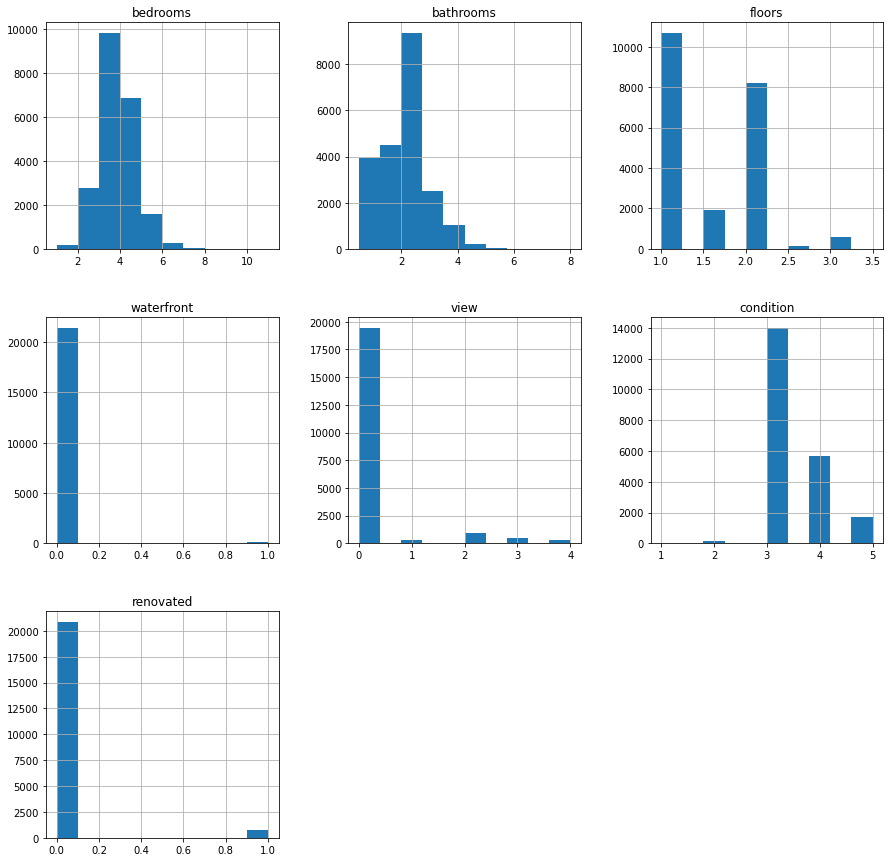

In [5]:
data[categoricals].hist(figsize = (15,15));

In [6]:
data['winter'] = data['month_1']+data['month_2']+data['month_3']
data.drop(['month_1','month_2','month_3'], axis = 1, inplace = True)
data['spring'] = data['month_4']+data['month_5']+data['month_6']
data.drop(['month_4','month_5','month_6'], axis = 1, inplace = True)
data['summer'] = data['month_7']+data['month_8']+data['month_9']
data.drop(['month_7','month_8','month_9'], axis = 1, inplace = True)
data['fall'] = data['month_10']+data['month_11']+data['month_12']
data.drop(['month_10','month_11','month_12'], axis = 1, inplace = True)

<AxesSubplot:>

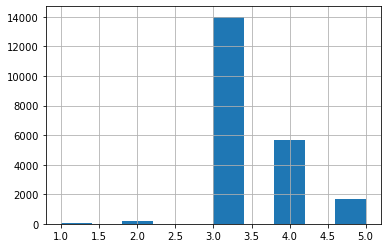

In [7]:
data['condition'].hist(bins=10)

In [8]:
data['condition'].value_counts()

3    14008
4     5677
5     1700
2      170
1       29
Name: condition, dtype: int64

In [9]:
data['condition_awful'] = (data['condition'] <= 2).map(int)
data['condition_avg'] = (data['condition'] == 3).map(int)
data['condition_good'] = (data['condition'] > 3).map(int)
data.drop('condition', inplace = True, axis = 1)

In [10]:
data['view_none'] = (data['view'] == 0).map(int)
data['view_avg'] = ((data['view']==1)|(data['view'] == 2)).map(int)
data['view_good'] = (data['view'] > 2).map(int)
data.drop('view', inplace = True, axis = 1)

In [11]:
data['floors_low'] = (data['floors'] <= 1.5).map(int)
data['floors_norm'] = ((data['floors'] > 2)&(data['floors'] <= 2.5)).map(int)
data['floors_many'] = (data['floors'] > 2.5).map(int)
data.drop('floors', inplace = True, axis = 1)

In [12]:
data['bedrooms_few'] = (data['bedrooms'] <= 2).map(int)
data['bedrooms_norm'] = ((data['bedrooms'] > 2)&(data['bedrooms'] <= 5)).map(int)
data['bedrooms_many'] = (data['bedrooms'] > 5).map(int)
data.drop('bedrooms', inplace = True, axis = 1)

In [13]:
data['bathrooms_few'] = (data['bathrooms'] <= 2).map(int)
data['bathrooms_norm'] = ((data['bathrooms'] > 2)&(data['bathrooms'] <= 3.5)).map(int)
data['bathrooms_many'] = (data['bathrooms'] > 3.5).map(int)
data.drop('bathrooms', inplace = True, axis = 1)

In [14]:
data.to_csv(path_or_buf = '../../../data/kc_house_data_binned.csv', index = False)